In [5]:
import os
import MDAnalysis as mda

In [6]:
#! pip install ipywidgets

In [7]:
import prolif as plf

In [8]:
from pathlib import Path
import sys
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, Draw, PandasTools, MolStandardize
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
import rdkit.rdBase as rkrb
import rdkit.RDLogger as rkl
from IPython.display import display, display_png
from pandas import DataFrame
import pandas as pd
import numpy as np
import logging
from tqdm import tqdm
from rdkit.Geometry import rdGeometry

# Upload molecules and protein

In [13]:
herg = PandasTools.LoadSDF('/home/elly/Programming/MD/herg_short_docked.sdf', molColName='ROMol', removeHs=False, includeFingerprints=True)


[19:57:01] ERROR: Counts line too short: '' on line380730
[19:57:01] ERROR: moving to the beginning of the next molecule


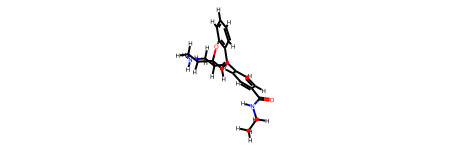

In [14]:
herg['ROMol'][1885]

In [15]:
prot1 = mda.Universe('/home/elly/Programming/MD/herg_dimer.pdb', guess_bonds=True)

In [21]:
pmol = plf.Molecule.from_mda(prot1)
pmol.n_residues

320

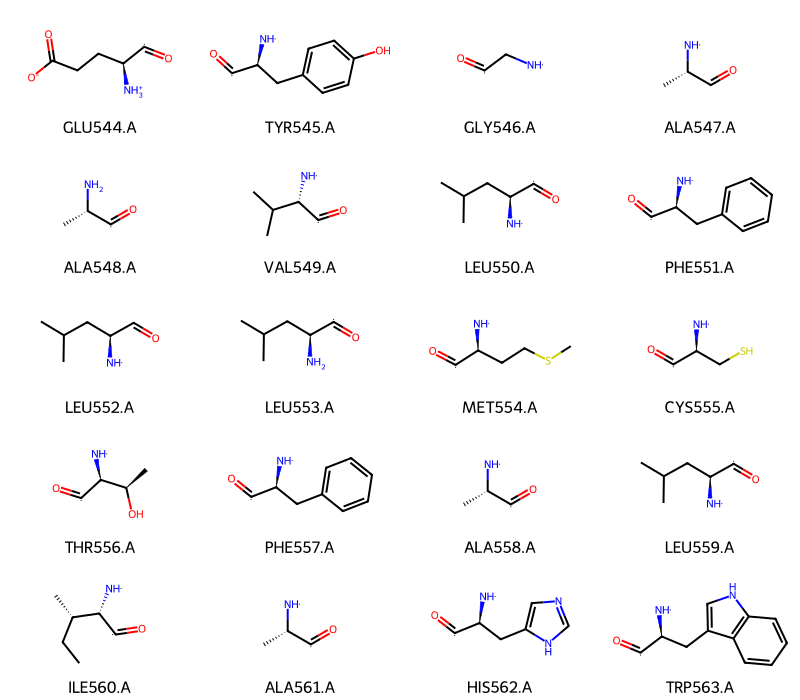

In [22]:
plf.display_residues(pmol, slice(20))

# Generate interaction fingerprints

In [24]:
lig_suppl = list(plf.sdf_supplier('/home/elly/Programming/MD/herg_short_docked.sdf'))
# generate fingerprint
fp = plf.Fingerprint()
fp.run_from_iterable(lig_suppl, pmol)
df = fp.to_dataframe()
df

  0%|          | 0/2883 [00:00<?, ?it/s]

ligand            UNL1                                                     \
protein       SER621.A LEU622.A               THR623.A                      
interaction VdWContact  HBDonor VdWContact Hydrophobic HBDonor VdWContact   
Frame                                                                       
0                False    False      False        True   False       True   
1                False    False       True       False   False      False   
2                False    False       True       False   False       True   
3                False    False      False       False   False       True   
4                False    False      False        True   False       True   
...                ...      ...        ...         ...     ...        ...   
2878             False    False       True       False   False      False   
2879             False    False      False       False   False      False   
2880             False    False       True       False   False       True   
2881             False    False      False        True   False      False   
2882             False    False      False        True   False       True   

ligand                                                  ...                    \
protein     SER624.A               VAL625.A   VAL644.A  ... TYR652.D            
interaction  HBDonor VdWContact Hydrophobic VdWContact  ...  HBDonor CationPi   
Frame                                                   ...                     
0               True       True       False      False  ...    False    False   
1              False      False       False      False  ...    False    False   
2              False      False       False      False  ...    False    False   
3              False      False       False      False  ...    False    False   
4              False       True       False      False  ...    False    False   
...              ...        ...         ...        ...  ...      ...      ...   
2878           False      False       False      False  ...    False    False   
2879           False      False       False      False  ...    False    False   
2880           False      False       False      False  ...    False    False   
2881           False      False       False      False  ...    False    False   
2882           False      False       False      False  ...    False    False   

ligand                                                                         \
protein                              ALA653.D               PHE656.D            
interaction PiStacking VdWContact Hydrophobic VdWContact Hydrophobic CationPi   
Frame                                                                           
0                False      False       False      False       False    False   
1                 True       True       False      False       False    False   
2                False       True       False      False       False    False   
3                False      False       False      False       False    False   
4                False       True       False      False       False    False   
...                ...        ...         ...        ...         ...      ...   
2878              True       True       False      False        True    False   
2879             False      False       False      False       False    False   
2880             False       True       False      False       False    False   
2881             False      False        True      False       False    False   
2882             False       True       False      False       False    False   

ligand                             
protein                            
interaction PiStacking VdWContact  
Frame                              
0                False      False  
1                False      False  
2                False      False  
3                False      False  
4                False      False  
...                ...        ...  
2878              True      False  
2879            

In [26]:
df[df[('UNL1', 'TYR652.D', 'CationPi')] == True]

ligand            UNL1                                                     \
protein       SER621.A LEU622.A               THR623.A                      
interaction VdWContact  HBDonor VdWContact Hydrophobic HBDonor VdWContact   
Frame                                                                       
509              False    False      False       False   False      False   
1440             False    False       True       False   False       True   
1885             False    False      False       False   False      False   
2435             False    False      False       False   False      False   
2449             False    False      False       False   False       True   

ligand                                                  ...                    \
protein     SER624.A               VAL625.A   VAL644.A  ... TYR652.D            
interaction  HBDonor VdWContact Hydrophobic VdWContact  ...  HBDonor CationPi   
Frame                                                   ...                     
509            False      False       False      False  ...    False     True   
1440           False       True       False      False  ...    False     True   
1885           False      False       False      False  ...    False     True   
2435           False      False       False      False  ...    False     True   
2449           False      False       False      False  ...    False     True   

ligand                                                                         \
protein                              ALA653.D               PHE656.D            
interaction PiStacking VdWContact Hydrophobic VdWContact Hydrophobic CationPi   
Frame                                                                           
509              False       True       False      False        True    False   
1440             False       True       False      False       False    False   
1885             False       True       False      False       False    False   
2435             False       True       False      False       False    False   
2449             False       True       False      False       False    False   

ligand                             
protein                            
interaction PiStacking VdWContact  
Frame                              
509              False      False  
1440             False      False  
1885             False      False  
2435             False      False  
2449             False      False  

[5 rows x 110 columns]

In [27]:
frame_number = 1885
ligand_residue = "UNL1"
protein_residue = "TYR652.D"

In [40]:
fp.ifp[frame_number][(ligand_residue, protein_residue)]

{'CationPi': ({'indices': {'ligand': (14,), 'protein': (5, 6, 8, 10, 9, 7)},
   'parent_indices': {'ligand': (14,),
    'protein': (4770, 4771, 4773, 4775, 4774, 4772)},
   'distance': 4.288424551990876,
   'angle': 22.945923648278633},),
 'VdWContact': ({'indices': {'ligand': (37,), 'protein': (4,)},
   'parent_indices': {'ligand': (37,), 'protein': (4769,)},
   'distance': 2.769808969446474},)}

In [43]:
fp1 = fp.ifp[frame_number][(ligand_residue, protein_residue)]

In [45]:
rows = []
for interaction, details in fp1.items():
    for detail in details:
        row = {
            'interaction': interaction,
            'indices': detail['indices'],
            'parent_indices': detail['parent_indices'],
            'distance': detail.get('distance', None),
            'angle': detail.get('angle', None)
        }
        rows.append(row)

# Create a DataFrame
df = pd.DataFrame(rows)

In [46]:
df

,interaction,indices,parent_indices,distance,angle
0,CationPi,"{'ligand': (14,), 'protein': (5, 6, 8, 10, 9, 7)}","{'ligand': (14,), 'protein': (4770, 4771, 4773...",4.288425,22.945924
1,VdWContact,"{'ligand': (37,), 'protein': (4,)}","{'ligand': (37,), 'protein': (4769,)}",2.769809,NaN
